In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [287]:
filename = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\2 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))
fft = np.fft.fft(data['channel_d'][:10**5])

In [288]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
print(np.sqrt(PSD[1][5500]*cal)/np.abs(fft[5500]))
cal2 = np.sqrt(PSD[1][5500]*cal)/np.abs(fft[5500])
print(np.abs(fft[5500]) * cal2)

8.390156439269522e-15
5.207593088810107e-13


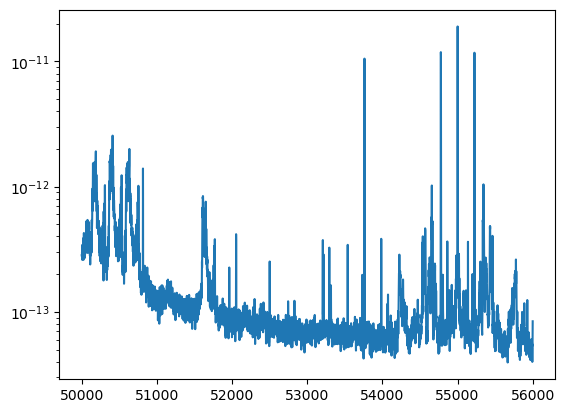

In [289]:
lb = 50000
ub = 56000
plt.plot(PSD[0][lb:ub], np.sqrt(PSD[1][lb:ub]*cal))
#plt.plot(PSD[0][lb:ub], np.abs(fft[lb:ub])*cal2)
plt.yscale('log')

In [2]:
freqs = [5500]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 9, 10, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
lockin_pos = np.zeros((len(cycles), len(directions), len(positions), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\2 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            li2 = np.zeros((int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    lockin = data['channel_g'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        li = np.mean(lockin)
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
                        li2[samples_per_file*n+i] = li
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2
            lockin_pos[cycle, direction-1, position] = li2

data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos, 'lockin': lockin_pos}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep2506102V.hdf5'
au.save_data_hdf5(filename, data_dict)

In [3]:
freqs = [5500]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 9, 10, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
lockin_pos = np.zeros((len(cycles), len(directions), len(positions), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\3 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            li2 = np.zeros((int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    lockin = data['channel_g'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        li = np.mean(lockin)
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
                        li2[samples_per_file*n+i] = li
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2
            lockin_pos[cycle, direction-1, position] = li2

data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos, 'lockin': lockin_pos}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep2506103V.hdf5'
au.save_data_hdf5(filename, data_dict)

In [4]:
freqs = [5500]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 9, 10, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
lockin_pos = np.zeros((len(cycles), len(directions), len(positions), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\3 V_flip\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            li2 = np.zeros((int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    lockin = data['channel_g'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        li = np.mean(lockin)
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
                        li2[samples_per_file*n+i] = li
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2
            lockin_pos[cycle, direction-1, position] = li2

data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos, 'lockin': lockin_pos}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep2506103V_flip.hdf5'
au.save_data_hdf5(filename, data_dict)

In [5]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
cal3 = 3.1825020700030454e-10
print(amps_pos[0,0,0,0,0]*cal3)

1.270363884489641e-12


In [290]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep2506102V.hdf5'
data = au.load_data_hdf52(filename)
amps_pos = data['amps']
phases_pos = data['phases']
cfs_pos = data['cfs']

In [292]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
cal3 = 3.21e-10
print(amps_pos[0,0,0,0,0]*cal3*np.sqrt(10))
np.sqrt(PSD[1][55000]*cal)

1.9898077550209662e-11


1.899850041589743e-11

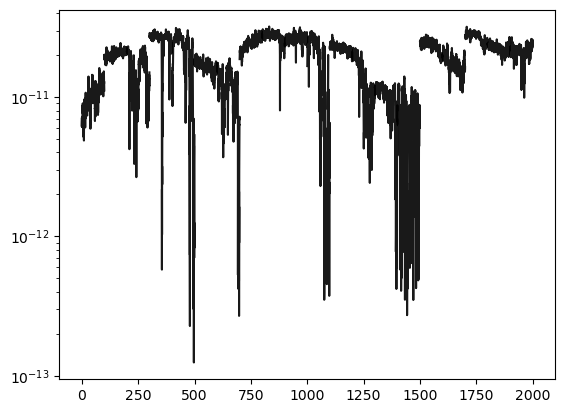

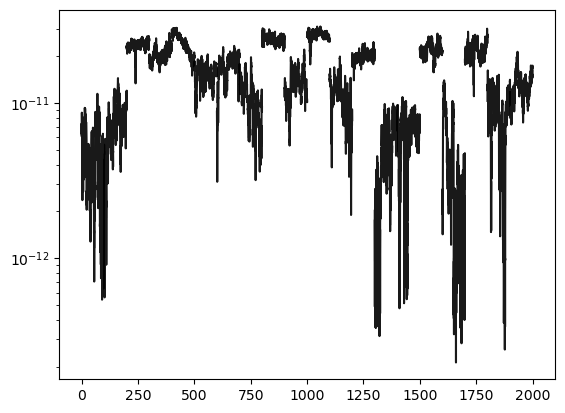

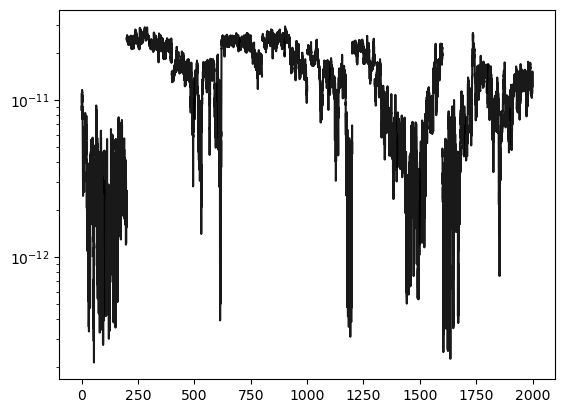

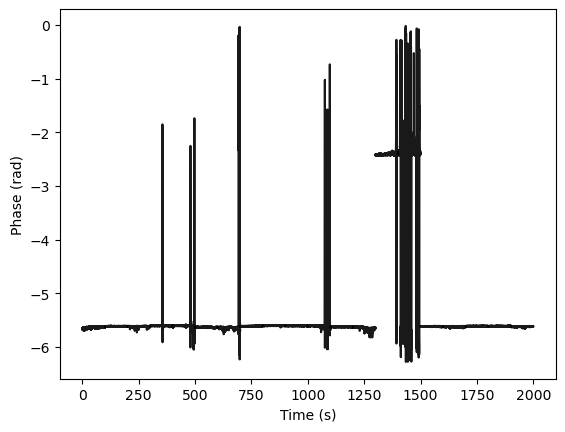

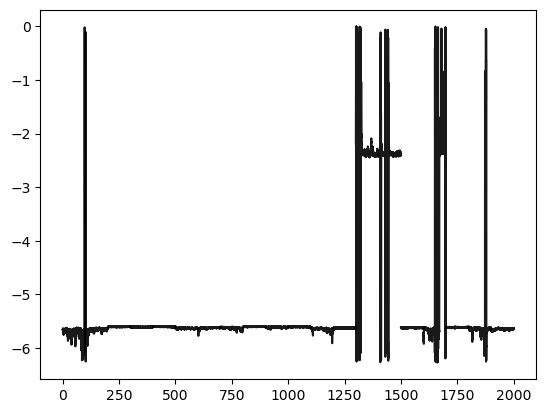

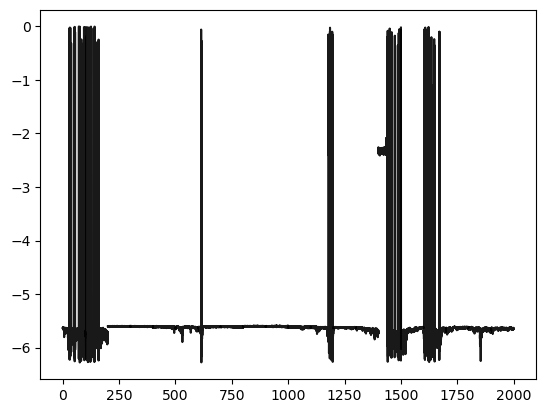

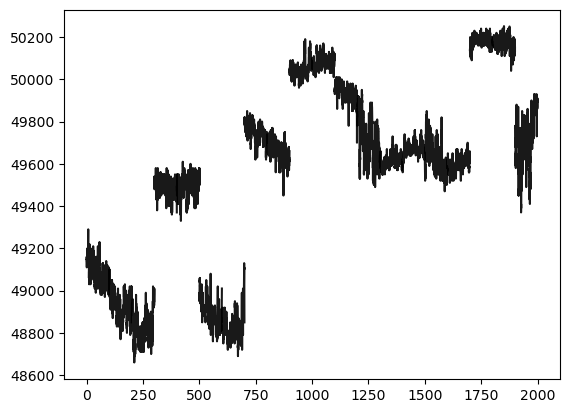

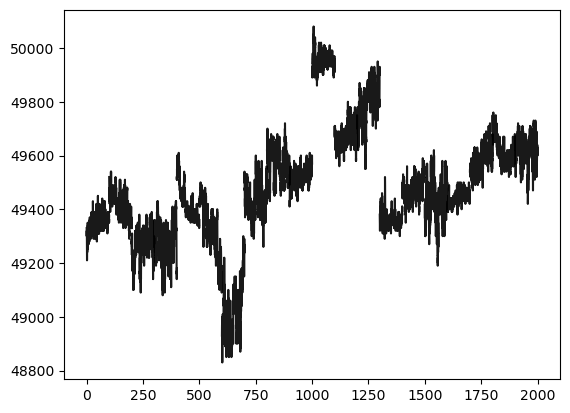

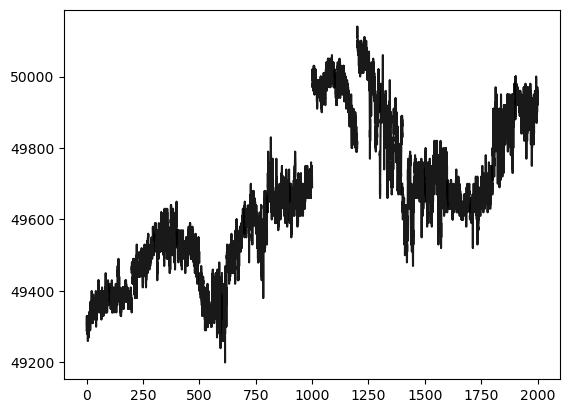

In [261]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((20, 1000))[:]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')

plt.figure()
for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.figure()
for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)

plt.figure()
for m, i in enumerate(cfs_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)


In [262]:
cf_rs = cfs_pos[:,:, 0, 0].reshape((20000))
amp_rs = amps_pos[:,:, 0, 0].reshape((20000))

cf_rs2 = cfs_pos[:,:, 1, 0].reshape((20000))
amp_rs2 = amps_pos[:,:, 1, 0].reshape((20000))

cf_rs3 = cfs_pos[:,:, 2, 0].reshape((20000))
amp_rs3 = amps_pos[:,:, 2, 0].reshape((20000))

In [263]:
amp_mean1 = np.mean(cal3*amp_rs)
amp_std1 = np.std(cal3*amp_rs)/np.sqrt(len(amp_rs[:37000]))
print(amp_mean1, amp_std1)

amp_mean12 = np.mean(cal3*amp_rs*np.abs((cf_rs**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std12 = np.std(cal3*amp_rs*np.abs((cf_rs**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs))
print(amp_mean12, amp_std12)

amp_mean2 = np.mean(cal3*amp_rs2[:37000])
amp_std2 = np.std(cal3*amp_rs2[:37000])/np.sqrt(len(amp_rs2[:37000]))
print(amp_mean2, amp_std2)

amp_mean22 = np.mean(cal3*amp_rs2[:37000]*np.abs((cf_rs2[:37000]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))
amp_std22 = np.std(cal3*amp_rs2[:37000]*np.abs((cf_rs2[:37000]**2 - 55000**2))/np.abs((cf_rs2[0]**2 - 55000**2)))/np.sqrt(len(amp_rs2[:37000]))
print(amp_mean22, amp_std22)

amp_mean3 = np.mean(cal3*amp_rs3[:37000])
amp_std3 = np.std(cal3*amp_rs3[:37000])/np.sqrt(len(amp_rs3[:37000]))
print(amp_mean3, amp_std3)

amp_mean32 = np.mean(cal3*amp_rs3[:37000]*np.abs((cf_rs3[:37000]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))
amp_std32 = np.std(cal3*amp_rs3[:37000]*np.abs((cf_rs3[:37000]**2 - 55000**2))/np.abs((cf_rs3[0]**2 - 55000**2)))/np.sqrt(len(amp_rs3[:37000]))
print(amp_mean32, amp_std32)

1.8920641283172955e-11 5.1213303164244667e-14
1.7442647572686797e-11 4.472059582326607e-14
1.5080148679456817e-11 5.63552966841109e-14
1.4654090433096157e-11 5.4179748927814314e-14
1.3583451413828576e-11 5.468974868324291e-14
1.2713866389381736e-11 5.169279380265251e-14


Text(0, 0.5, 'Amplitude (m/$\\sqrt{Hz}$)')

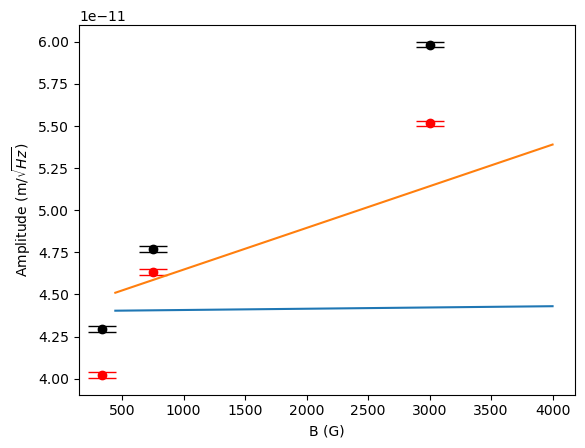

In [264]:
B = 3000*np.array([1, (8/16)**2, (8/24)**2])
B2 = 4000*np.linspace(1, (8/24)**2, 1000)

m1 = np.array([amp_mean1, amp_mean2, amp_mean3])
s1 = np.array([amp_std1, amp_std2, amp_std3])

m2 = np.array([amp_mean12, amp_mean22, amp_mean32])
s2 = np.array([amp_std12, amp_std22, amp_std32])

plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')

plt.plot(B2, 4.4*10**(-11)+B2*3*10**(-13)/4000, label = 'Expected')
plt.plot(B2, 4.4*10**(-11)+B2*3*10**(-13)/4000*33, label = 'Expected')
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')


In [265]:
lb = 1000
ub = 3000

amp_mean1 = np.mean(cal3*amp_rs[lb:ub])
amp_std1 = np.std(cal3*amp_rs[lb:ub])/np.sqrt(len(amp_rs[lb:ub]))
print(amp_mean1, amp_std1)

amp_mean2 = np.mean(cal3*amp_rs2[lb:ub])
amp_std2 = np.std(cal3*amp_rs2[lb:ub])/np.sqrt(len(amp_rs2[lb:ub]))
print(amp_mean2, amp_std2)

amp_mean3 = np.mean(cal3*amp_rs3[lb:ub])
amp_std3 = np.std(cal3*amp_rs3[lb:ub])/np.sqrt(len(amp_rs3[lb:ub]))
print(amp_mean3, amp_std3)

1.768664477150838e-11 9.936645526452313e-14
1.5438661916268413e-11 1.8946787690937172e-13
1.3655487260623906e-11 2.446467366181057e-13


Text(0, 0.5, 'Amplitude (m/$\\sqrt{Hz}$)')

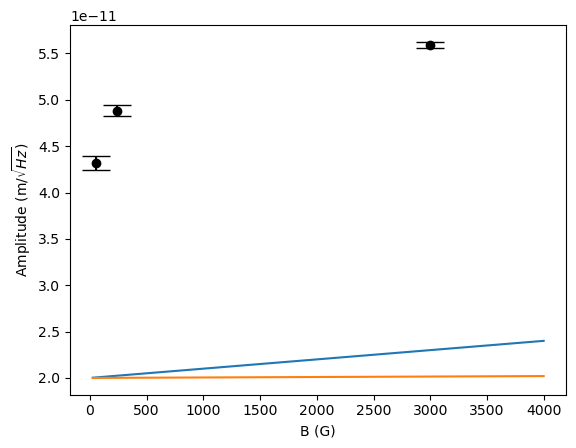

In [266]:
B = [3000, 236, 54]
B2 = 4000*np.linspace(1, (8/100)**2, 1000)

m1 = np.array([amp_mean1, amp_mean2, amp_mean3])
s1 = np.array([amp_std1, amp_std2, amp_std3])

plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.plot(B2, 2*10**(-11)+B2*2*10**(-13)/4000*20, label = 'x20')
plt.plot(B2, 2*10**(-11)+B2*2*10**(-13)/4000, label = 'Expected')
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')


In [267]:
# Phase

In [268]:
phase_rs = phases_pos[:,:, 0, 0].reshape((20000))
phase_rs2 = phases_pos[:,:, 1, 0].reshape((20000))
phase_rs3 = phases_pos[:,:, 2, 0].reshape((20000))

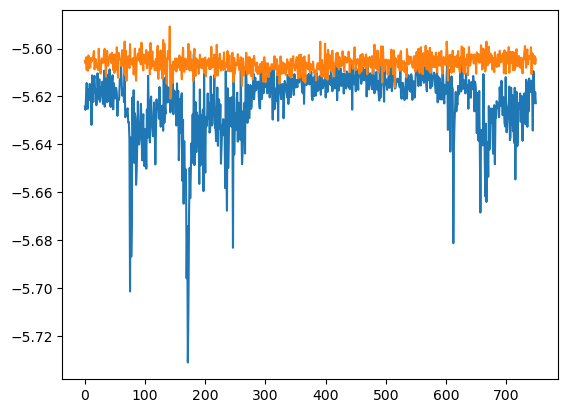

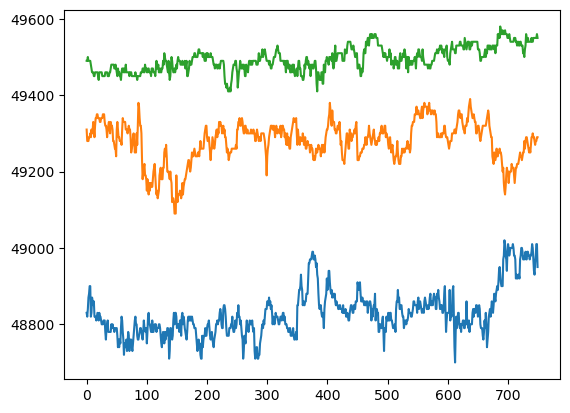

In [269]:
lb = 2250
ub = 3000
plt.plot(phase_rs[lb:ub])
plt.plot(phase_rs2[lb:ub])
#plt.plot(phase_rs3[lb:ub])
plt.figure()
plt.plot(cf_rs[lb:ub])
plt.plot(cf_rs2[lb:ub])
plt.plot(cf_rs3[lb:ub])

In [270]:
#lb = 2000
#ub = 3000
pm1 = np.mean(phase_rs[lb:ub])
pm2 = np.mean(phase_rs2[lb:ub])
pm3 = np.mean(phase_rs3[lb:ub])

std1 = np.std(phase_rs[lb:ub])/np.sqrt(len(phase_rs[lb:ub]))
std2 = np.std(phase_rs2[lb:ub])/np.sqrt(len(phase_rs2[lb:ub]))  
std3 = np.std(phase_rs3[lb:ub])/np.sqrt(len(phase_rs3[lb:ub]))
print(np.mean(phase_rs[lb:ub]), np.std(phase_rs[lb:ub])/np.sqrt(len(phase_rs[lb:ub])))
print(np.mean(phase_rs2[lb:ub]), np.std(phase_rs2[lb:ub])/np.sqrt(len(phase_rs2[lb:ub])))
print(np.mean(phase_rs3[lb:ub]), np.std(phase_rs3[lb:ub])/np.sqrt(len(phase_rs3[lb:ub])))

-5.622166823506843 0.0005037823305023847
-5.605952422852346 0.00012917945720696791
-5.60363464147924 0.0001226725906812423


<ErrorbarContainer object of 3 artists>

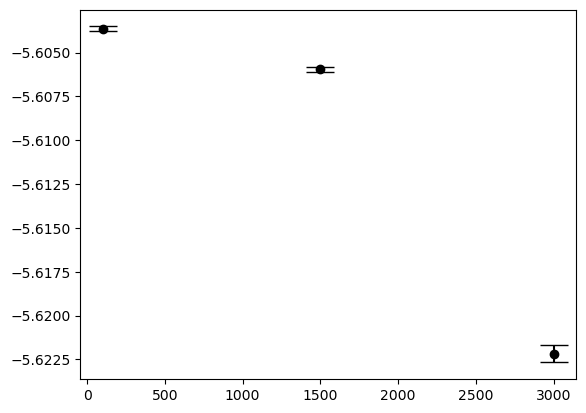

In [271]:
B = [3000, 1500, 100]
plt.errorbar(B, [pm1, pm2, pm3], yerr = [std1, std2, std3], marker = 'o', linestyle = 'None', color = 'k', capsize = 10, label = 'Phase')
#plt.plot([0, 3000], [-2.4425, -2.4425-0.005])
#plt.plot([0, 3000], [-3.3, -3.3-0.3/np.sqrt(10)])

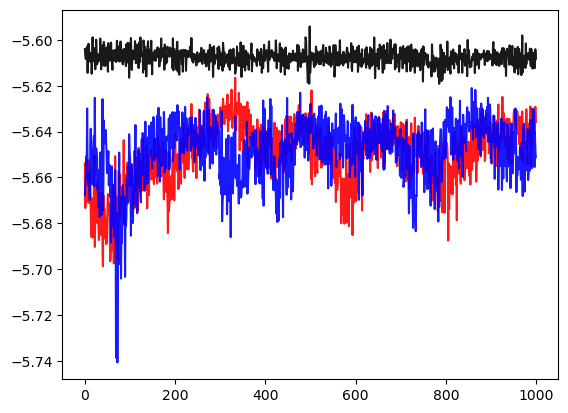

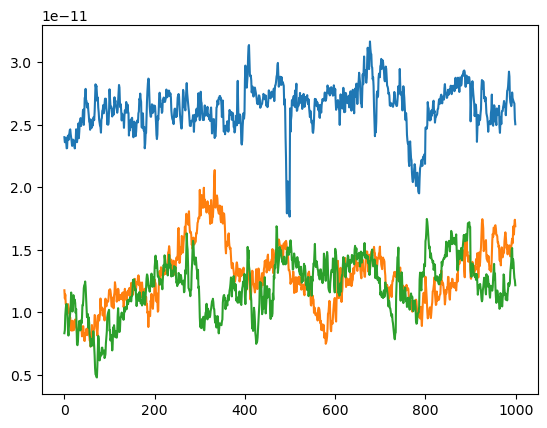

In [272]:
plt.plot(phases_pos[4, 1, 0, 0, :], 'k', alpha = 0.9)
plt.plot(phases_pos[-1, -1, 1, 0, :], 'r', alpha = 0.9)
plt.plot(phases_pos[-1, -1, 2, 0, :], 'b', alpha = 0.9)
plt.figure()
plt.plot(amps_pos[4, 1, 0, 0]*cal3)
plt.plot(amps_pos[-1, -1, 1, 0]*cal3)
plt.plot(amps_pos[-1, -1, 2, 0]*cal3)

In [273]:
phase_rs_g = np.array([])
for i in range(int(len(phase_rs)/100)):
    var = np.var(phase_rs[i*100:(i+1)*100])
    if var < 0.001:
        if np.mean(phase_rs[i*100:(i+1)*100]) < -3:
            phase_rs_g = np.concatenate((phase_rs_g, np.pi+ phase_rs[i*100:(i+1)*100]))
        else:
            phase_rs_g = np.concatenate((phase_rs_g, phase_rs[i*100:(i+1)*100]))

phase_rs2_g = np.array([])
for i in range(int(len(phase_rs2)/100)):
    var = np.var(phase_rs2[i*100:(i+1)*100])
    if var < 0.001:
        if np.mean(phase_rs2[i*100:(i+1)*100]) < -3:
            phase_rs2_g = np.concatenate((phase_rs2_g, np.pi+ phase_rs2[i*100:(i+1)*100]))
        else:
            phase_rs2_g = np.concatenate((phase_rs2_g, phase_rs2[i*100:(i+1)*100]))

phase_rs3_g = np.array([])
for i in range(int(len(phase_rs3)/100)):
    var = np.var(phase_rs3[i*100:(i+1)*100])
    if var < 0.001:
        if np.mean(phase_rs3[i*100:(i+1)*100]) < -3:
            phase_rs3_g = np.concatenate((phase_rs3_g, np.pi+ phase_rs3[i*100:(i+1)*100]))
        else:
            phase_rs3_g = np.concatenate((phase_rs3_g, phase_rs3[i*100:(i+1)*100]))

-2.4754928096781876
-2.4784116053087786
-2.482949893291248


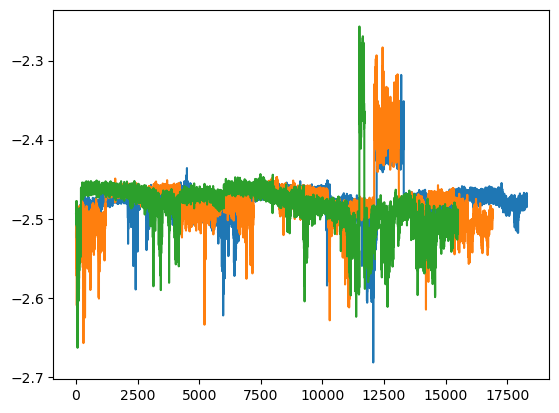

In [274]:
plt.plot(phase_rs_g[:])
plt.plot(phase_rs2_g)
plt.plot(phase_rs3_g)
print(np.mean(phase_rs_g))
print(np.mean(phase_rs2_g))
print(np.mean(phase_rs3_g))
#plt.plot(phase_rs_g+np.pi)

In [275]:
m1 = np.mean(phase_rs_g)
m2 = np.mean(phase_rs2_g)   
m3 = np.mean(phase_rs3_g)
s1 = np.std(phase_rs_g)/np.sqrt(len(phase_rs_g))
s2 = np.std(phase_rs2_g)/np.sqrt(len(phase_rs2_g))
s3 = np.std(phase_rs3_g)/np.sqrt(len(phase_rs3_g))

<ErrorbarContainer object of 3 artists>

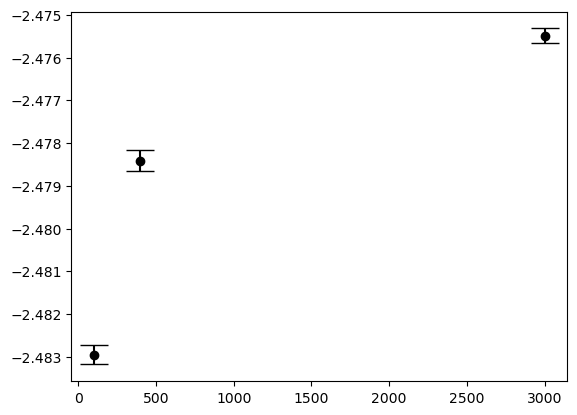

In [293]:
B = [3000, 400, 100]
plt.errorbar(B, [m1, m2, m3], yerr = [s1, s2, s3], marker = 'o', linestyle = 'None', color = 'k', capsize = 10, label = 'Phase (filtered)')

In [277]:
def lockin_ext_signal(data, ext_sig, phase, fs, demod_freq, BW_pre, BW, BW2, mode):
    time = np.array(range(len(data)))/fs
    if phase == 0:
        demod = ext_sig
        esfft = np.fft.rfft(ext_sig)
        esfft_phaseshift = np.exp(np.pi/2*1j)*esfft
        demod2 = np.fft.irfft(esfft_phaseshift)
    else:
        esfft = np.fft.rfft(ext_sig)
        esfft_phaseshift = np.exp((phase)*1j)*esfft
        demod = np.fft.irfft(esfft_phaseshift)
        esfft_phaseshift = np.exp((np.pi/2+phase)*1j)*esfft
        demod2 = np.fft.irfft(esfft_phaseshift)
    if BW_pre != 0:
            data = au.butter_bandpass_filter(data, demod_freq - BW_pre, demod_freq + BW_pre, fs, order = 3)
    X_tt = data*demod
    Y_tt = data*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, BW, fs, order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, BW, fs, order = 3)
    if mode == 'XY':
        return time, X_tt_filt, Y_tt_filt
    elif mode == 'R':
        R2 = X_tt_filt**2 + Y_tt_filt**2
        theta = np.unwrap(-2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:]))/2
        R2_filt = au.butter_lowpass_filter(R2, BW2, fs, order = 2)
        theta_filt = au.butter_lowpass_filter(theta, BW2, fs, order = 2)
        return time, R2, theta, R2_filt, theta_filt
    else:
        return 0

In [278]:
filename = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\3 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
PSD_drive = scisig.welch(data['channel_f'][:10**7], fs = 1/attrs['delta_t'], nperseg = int(10/attrs['delta_t']))
fft = np.fft.rfft(data['channel_d'][:10**5])
fft_drive = np.fft.rfft(data['channel_f'][:10**5])
d_filt = au.butter_bandpass_filter(data['channel_d'], 54999, 55001, fs = 1/attrs['delta_t'], order = 2)

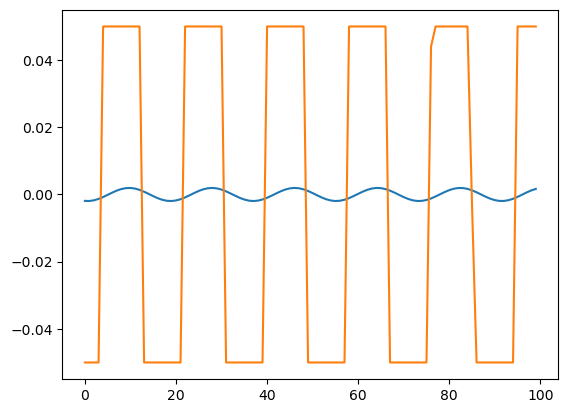

In [ ]:
plt.plot(d_filt[10**6:10**6+100])
plt.plot(data['channel_f'][10**6:10**6+100])

In [284]:

np.abs(np.fft.rfft(data['channel_d'][:10**5]))[5500]

126.0072386052726

In [ ]:
time, X, Y = lockin_ext_signal(d_filt, data['channel_g'], phase = -0.67, fs = 1/attrs['delta_t'], demod_freq = 55000, BW_pre = 0, BW = 10, BW2 = 10, mode = 'XY')

In [ ]:
lb = 10**6
ub = 9*10**6
s = 10**4

plt.plot(time[lb:ub:s], X[lb:ub:s])
plt.plot(time[lb:ub:s], Y[lb:ub:s])
plt.figure()
plt.plot(time[lb:ub:s], X[lb:ub:s]/np.sqrt(X[lb:ub:s]**2 + Y[lb:ub:s]**2))
plt.plot(time[lb:ub:s], Y[lb:ub:s]/np.sqrt(X[lb:ub:s]**2 + Y[lb:ub:s]**2))
plt.figure()
plt.plot(time[lb:ub:s], Y[lb:ub:s]/X[lb:ub:s])